In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

plt.style.use('ggplot')
pd.options.display.max_columns = None

In [3]:
# Training data sets
train_beneficiarydata = pd.read_csv("Train_Beneficiarydata.csv")
train_inpatientdata = pd.read_csv("Train_Inpatientdata.csv")
train_outpatientdata = pd.read_csv("Train_Outpatientdata.csv")
train_potentialfraud = pd.read_csv("Train.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("Test_Beneficiarydata.csv")
test_inpatientdata = pd.read_csv("Test_Inpatientdata.csv")
test_outpatientdata = pd.read_csv("Test_Outpatientdata.csv")
test_potentialfraud = pd.read_csv("Test.csv")

In [4]:
#Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))

In [5]:
#Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)

In [6]:
#Merge the patient data frame and 
full_data =pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [7]:
full_data= pd.merge(full_data, train_potentialfraud, on='Provider', how='left')

In [7]:
full_data.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,1749,1068.0,2009-10-12,597,1745,V4571,78702,28521,7019,1963,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,inpatient,1940-06-01,NaN,2,1,0,31,270,12,12,1,1,1,1,1,2,1,1,2,1,1,22000,2136,1400,840,Yes
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,5699,1068.0,2009-01-07,390,1536,73300,7230,3659,2859,4019,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN,inpatient,1939-10-01,NaN,1,2,0,24,120,12,12,1,1,2,1,2,2,2,1,1,1,2,8000,1068,860,50,No
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,78605,1068.0,2009-08-07,379,56212,25000,30000,73300,2766,53081,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,inpatient,1941-12-01,NaN,1,1,0,38,230,12,12,2,2,2,2,2,2,1,1,1,2,2,6000,1068,0,0,Yes
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,2859,1068.0,2009-08-09,294,42823,4280,6822,40390,43811,78322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1944-12-01,NaN,2,1,0,38,200,12,12,2,1,1,2,2,2,2,1,1,2,2,23650,2136,40,0,No
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,41401,1068.0,2009-01-05,262,41041,3669,V851,25062,V074,2766,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,inpatient,1946-03-01,NaN,2,1,0,34,760,12,12,1,1,1,2,1,1,1,1,2,1,1,131140,2136,1650,80,Yes


In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

## Associate Rule Mining

In [9]:
#Filtering data set with chronic conditions
chronic= full_data.filter(regex='Chronic').replace(to_replace=2, value=0)
chronic.columns = [col.replace('ChronicCond_', '') for col in chronic.columns]
chronic

,Alzheimer,Heartfailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,rheumatoidarthritis,stroke
0,1,0,1,0,0,1,1,1,0,1,1
1,1,0,1,0,0,1,1,1,0,1,1
2,1,0,1,0,0,1,1,1,0,1,1
3,0,1,1,0,0,1,1,0,0,1,1
4,0,1,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
558206,1,1,0,0,0,1,1,0,0,1,0
558207,1,1,0,0,0,1,1,0,0,1,0
558208,1,1,0,0,0,1,1,0,0,1,0
558209,1,1,0,0,0,1,1,0,0,1,0


In [10]:
freq_items = apriori(chronic, min_support=0.2, use_colnames=True)
freq_items

C:\Miniconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
0,0.401868,(Alzheimer)
1,0.590427,(Heartfailure)
2,0.412002,(KidneyDisease)
3,0.312930,(ObstrPulmonary)
4,0.434807,(Depression)
5,0.705395,(Diabetes)
6,0.759265,(IschemicHeart)
7,0.317647,(Osteoporasis)
8,0.311171,(rheumatoidarthritis)
9,0.282900,"(Alzheimer, Heartfailure)"


In [11]:
support = freq_items.sort_values(by="support").sort_values(by="support").tail(15)
support

,support,itemsets
13,0.336625,"(Alzheimer, IschemicHeart)"
26,0.347843,"(Diabetes, Depression)"
27,0.357961,"(Depression, IschemicHeart)"
22,0.359443,"(Diabetes, KidneyDisease)"
23,0.363022,"(IschemicHeart, KidneyDisease)"
0,0.401868,(Alzheimer)
2,0.412002,(KidneyDisease)
42,0.422510,"(Diabetes, Heartfailure, IschemicHeart)"
4,0.434807,(Depression)
17,0.476639,"(Diabetes, Heartfailure)"


Text(0.5, 1.0, 'Percent of Patient With Chronic Conditions')

<Figure size 1000x1000 with 0 Axes>

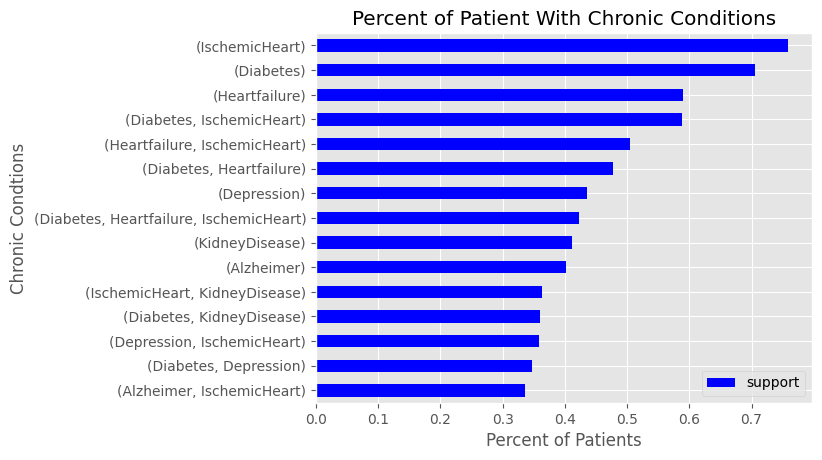

In [12]:
# Plot the frequent items
plt.figure(figsize=(10,10))
support.plot.barh(y='support', x='itemsets', color="blue")
plt.ylabel('Chronic Condtions')
plt.xlabel('Percent of Patients')
plt.title('Percent of Patient With Chronic Conditions')

In [28]:
rules = association_rules(freq_items, metric="support", min_threshold=0.2)
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")


a= rules.sort_values(by='confidence', ascending=False)[:30]

In [29]:
a

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
166,"Diabetes, ObstrPulmonary, Heartfailure",IschemicHeart,0.215415,0.759265,0.200301,0.929836,1.224653,0.036744,3.431039,0.233808
155,"Diabetes, Heartfailure, KidneyDisease",IschemicHeart,0.285587,0.759265,0.263621,0.923083,1.215758,0.046784,3.129792,0.248411
84,"ObstrPulmonary, Heartfailure",IschemicHeart,0.243698,0.759265,0.223229,0.916007,1.206439,0.038198,2.866130,0.226252
74,"Heartfailure, KidneyDisease",IschemicHeart,0.317697,0.759265,0.289727,0.911961,1.201111,0.048511,2.734417,0.245400
114,"Diabetes, ObstrPulmonary",IschemicHeart,0.266424,0.759265,0.242548,0.910383,1.199032,0.040261,2.686252,0.226280
154,"KidneyDisease, Heartfailure, IschemicHeart",Diabetes,0.289727,0.705395,0.263621,0.909892,1.289906,0.059249,3.269488,0.316427
138,"Diabetes, Alzheimer, Heartfailure",IschemicHeart,0.243858,0.759265,0.221655,0.908951,1.197146,0.036502,2.644008,0.217789
180,"Diabetes, Heartfailure, Depression",IschemicHeart,0.254338,0.759265,0.230060,0.904546,1.191344,0.036950,2.521999,0.215395
109,"Diabetes, KidneyDisease",IschemicHeart,0.359443,0.759265,0.323362,0.899619,1.184855,0.050449,2.398208,0.243561
68,"Heartfailure, KidneyDisease",Diabetes,0.317697,0.705395,0.285587,0.898930,1.274364,0.061486,2.914858,0.315542


In [15]:
ante = tuple(a['antecedents'])
conse = tuple(a['consequents'])

lab = list(zip(ante, conse))
confi = list(round(a['confidence'], 2))


labels_dict = {}

for i in range(len(a)):
    labels_dict[lab[i]] = confi[i]

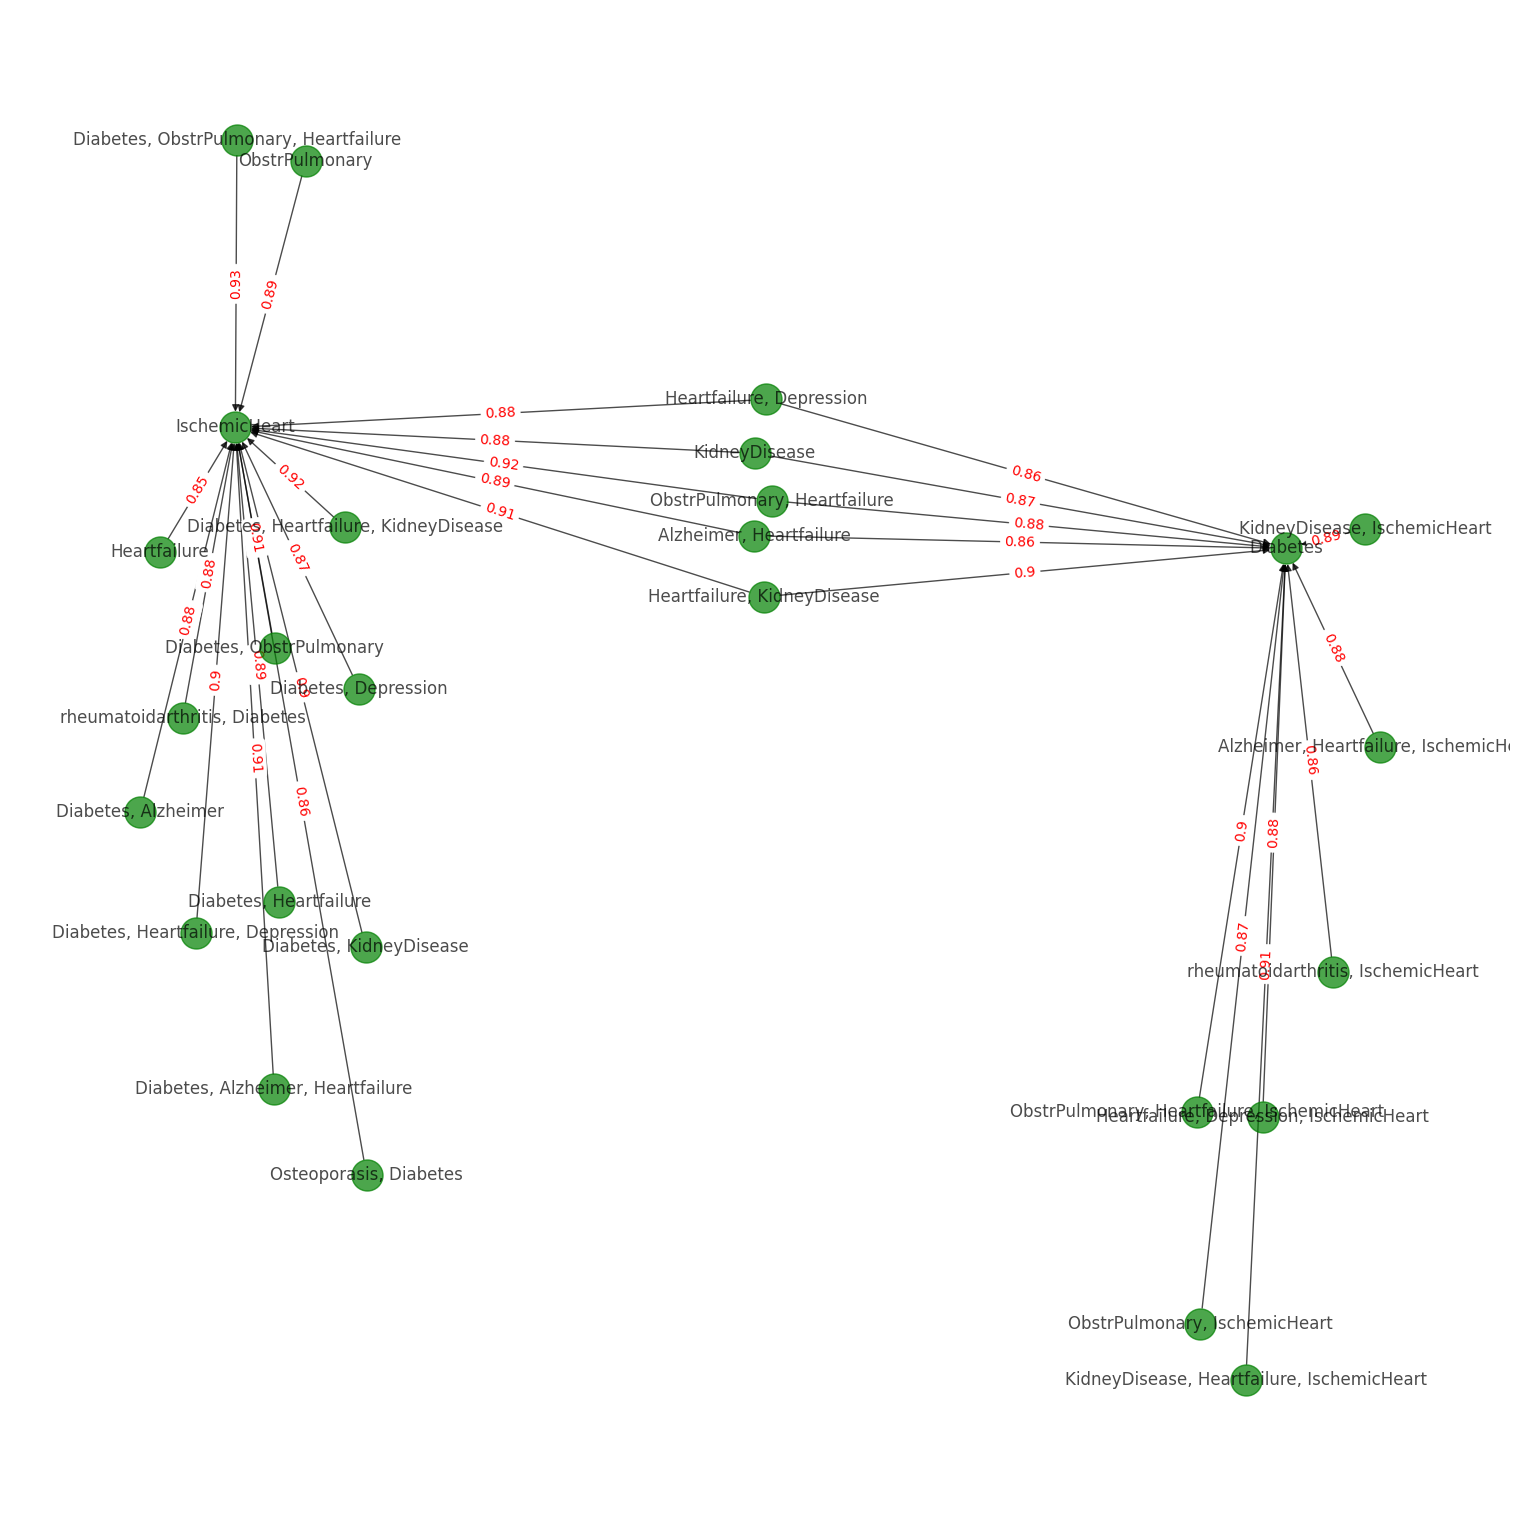

In [17]:
import networkx as nx

a['weight'] = list(zip(a['antecedents'], a['consequents'], a['support']))


edges = [[ante[i], conse[i]] for i in range(len(a))]


tuple(zip(ante, conse))


G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 15))

nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='green',alpha=0.7,\
labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels_dict,font_color='red')
plt.axis('off')
plt.show()

## Conclusion

* 2 means no chronic condition, 1 means with chronic condition
* Fraudulent providers have 71% patients with diabetes, and 76% patients with ischemic heart.

In [62]:
fraud = full_data.loc[full_data["PotentialFraud"] == "Yes"]

In [63]:
(fraud["ChronicCond_Diabetes"].value_counts()/fraud["ChronicCond_Diabetes"].count())*100

1    70.849546
2    29.150454
Name: ChronicCond_Diabetes, dtype: float64

In [64]:
(fraud["ChronicCond_IschemicHeart"].value_counts()/fraud["ChronicCond_IschemicHeart"].count())*100

1    76.369857
2    23.630143
Name: ChronicCond_IschemicHeart, dtype: float64

In [65]:
(fraud["ChronicCond_Heartfailure"].value_counts()/fraud["ChronicCond_Heartfailure"].count())*100

1    59.609203
2    40.390797
Name: ChronicCond_Heartfailure, dtype: float64

C:\Users\李岳\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Miniconda\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


[None]

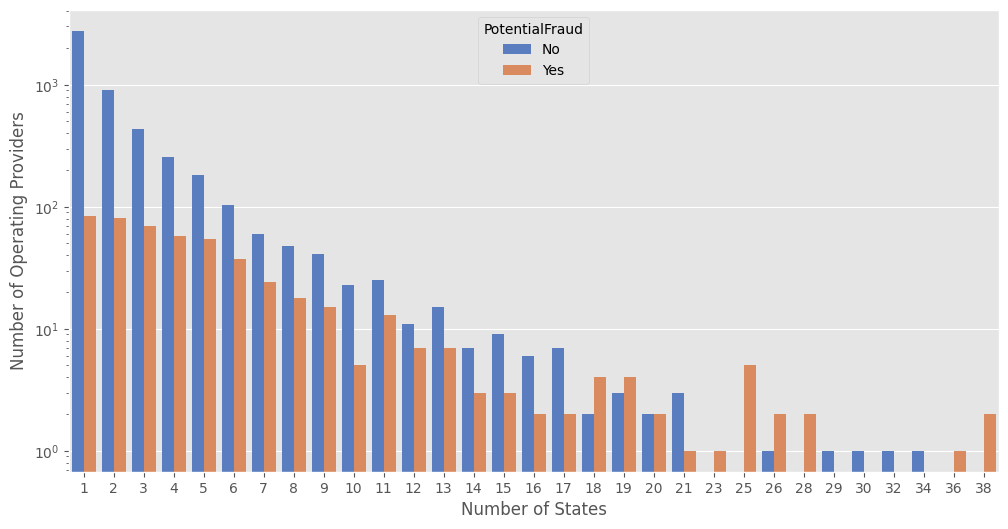

In [8]:
provData = full_data[['Provider','PotentialFraud','State','County']]
provNet = provData.groupby(['Provider','PotentialFraud'])['State'].nunique().reset_index()

plt.figure(figsize=(12,6))


ax1 = sns.countplot(x = 'State', hue = 'PotentialFraud', data=provNet, palette = 'muted')

ax1.set(xlabel='Number of States', ylabel='Number of Operating Providers')
ax1.set(yscale="log")